# **INFOSYS**

In [39]:
import pandas_datareader as pdr
import datetime
import pandas as pd

start = datetime.datetime(2018,1,1)
end = datetime.datetime(2021,2,1)
print(start)
print(end)

2018-01-01 00:00:00
2021-02-01 00:00:00


In [22]:
stock = ['infy']
data = pdr.DataReader(stock,'stooq',str(start.date()),str(end.date())).stack('Symbols')
data.head()

,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2021-02-01,infy,16.7904,16.8287,16.4713,16.6068,6.033910e+06
2021-01-29,infy,16.3074,16.6460,16.3025,16.5774,1.001105e+07
2021-01-28,infy,17.0417,17.1477,16.8198,16.8679,8.154286e+06
2021-01-27,infy,16.8777,17.2832,16.8483,17.0515,1.178830e+07
2021-01-26,infy,17.2440,17.3126,17.1477,17.3126,5.664802e+06


In [23]:
newData = data.reset_index()
newData.head()

Attributes,Date,Symbols,Close,High,Low,Open,Volume
0,2021-02-01,infy,16.7904,16.8287,16.4713,16.6068,6.033910e+06
1,2021-01-29,infy,16.3074,16.6460,16.3025,16.5774,1.001105e+07
2,2021-01-28,infy,17.0417,17.1477,16.8198,16.8679,8.154286e+06
3,2021-01-27,infy,16.8777,17.2832,16.8483,17.0515,1.178830e+07
4,2021-01-26,infy,17.2440,17.3126,17.1477,17.3126,5.664802e+06


In [24]:
newData.to_csv('Infosys_stock_2018_to_2020.csv')

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume
Date,,,,,,,
2018-01-02,775,infy,7.24550,7.28987,7.21909,7.23676,1.382488e+07
2018-01-03,774,infy,7.18336,7.23676,7.16087,7.22341,1.152342e+07
2018-01-04,773,infy,7.13869,7.20563,7.12544,7.20563,1.829198e+07
2018-01-05,772,infy,7.27210,7.28556,7.18336,7.19209,1.102944e+07
2018-01-08,771,infy,7.33012,7.34789,7.26778,7.28556,1.258842e+07


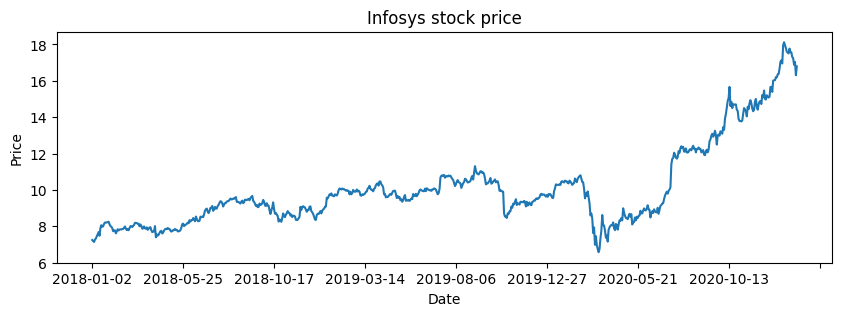

In [25]:
import matplotlib.pyplot as plt
# plot the close price fo the tesla stock
# load the csv file
infy_data = pd.read_csv('/content/Infosys_stock_2018_to_2020.csv')

# set the date as the index
infy_data.set_index('Date',inplace=True)
# sort the data into ascending order wrt dates
infy_data.sort_index(ascending=True,inplace=True)


# and then sperate the close price
close_price = infy_data['Close']
# then plot the close price
close_price.plot(xlabel='Date',ylabel='Price',label='Infosys',title=
                'Infosys stock price',figsize=(10,3))

infy_data.head()

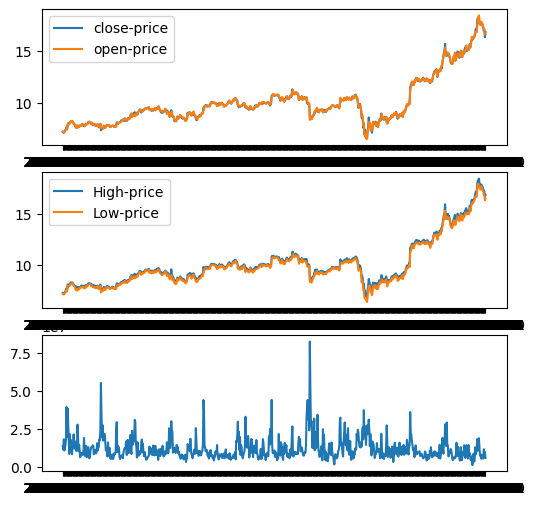

In [26]:
plt.figure(2,(6,6))
plt.subplot(3,1,1)
plt.plot(infy_data['Close'],label='close-price')
plt.plot(infy_data['Open'],label='open-price')
plt.legend()

plt.subplot(3,1,2)
plt.plot(infy_data['High'],label='High-price')
plt.plot(infy_data['Low'],label='Low-price')
plt.legend()
plt.subplot(3,1,3)
plt.plot(infy_data['Volume'],label='Volumne')


In [27]:
# moving average

infy_data.head()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume
Date,,,,,,,
2018-01-02,775,infy,7.24550,7.28987,7.21909,7.23676,1.382488e+07
2018-01-03,774,infy,7.18336,7.23676,7.16087,7.22341,1.152342e+07
2018-01-04,773,infy,7.13869,7.20563,7.12544,7.20563,1.829198e+07
2018-01-05,772,infy,7.27210,7.28556,7.18336,7.19209,1.102944e+07
2018-01-08,771,infy,7.33012,7.34789,7.26778,7.28556,1.258842e+07


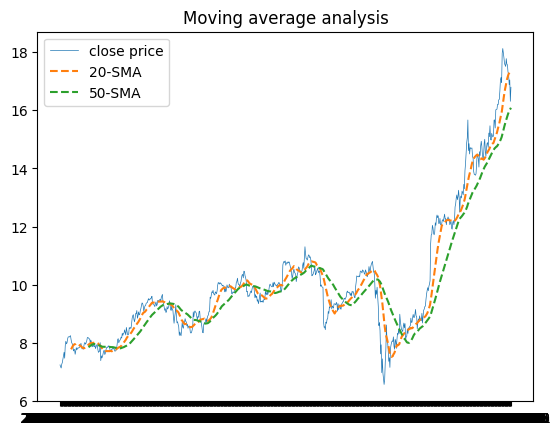

In [28]:
# calulate the moving average
infy_data['SMA_20'] = infy_data['Close'].rolling(20).mean()
infy_data['SMA_50'] = infy_data['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(infy_data['Close'],label='close price',linewidth=0.5)
plt.plot(infy_data['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(infy_data['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()

In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=09966f3baf6c6f5722ec64d487f5a518e79874d1e026af13853463560dfe1da7
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


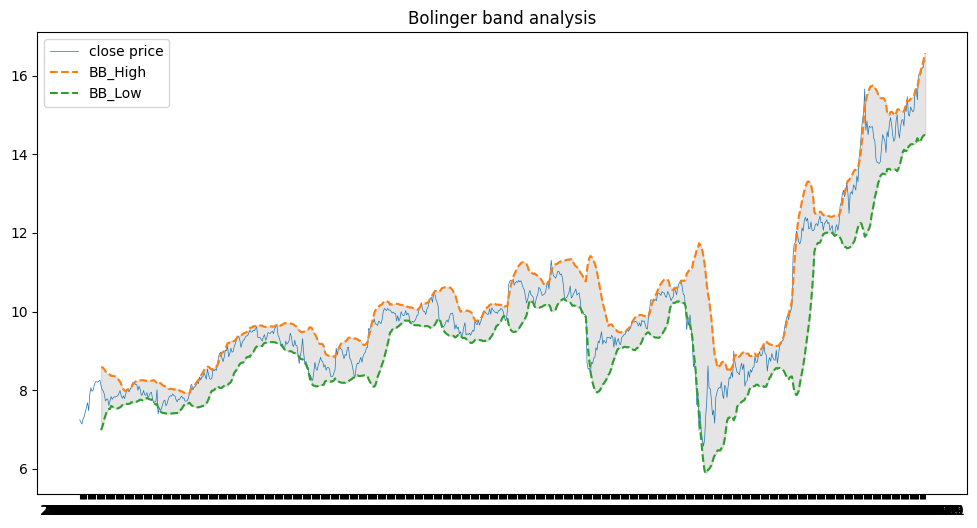

In [ ]:
import ta
# bollinger band
bb = ta.volatility.BollingerBands(infy_data['Close'],window=20,window_dev=2)

infy_data['BB_High']=bb.bollinger_hband()
infy_data['BB_Low']=bb.bollinger_lband()
plt.figure(1,(12,6))
plt.plot(infy_data['Close'],label='close price',linewidth=0.5)
plt.plot(infy_data['BB_High'],label='BB_High',linestyle='--')
plt.plot(infy_data['BB_Low'],label='BB_Low',linestyle='--')
plt.fill_between(infy_data.index,infy_data['BB_High'],infy_data['BB_Low'],color = 'gray',alpha=0.2)
plt.title('Bolinger band analysis')
plt.legend()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI
Date,,,,,,,,,,
2021-01-26,4,infy,17.2440,17.3126,17.1477,17.3126,5.664802e+06,17.245755,15.923314,57.322788
2021-01-27,3,infy,16.8777,17.2832,16.8483,17.0515,1.178830e+07,17.279570,15.972008,49.894903
2021-01-28,2,infy,17.0417,17.1477,16.8198,16.8679,8.154286e+06,17.322075,16.017404,52.841300
2021-01-29,1,infy,16.3074,16.6460,16.3025,16.5774,1.001105e+07,17.319670,16.044854,41.168212
2021-02-01,0,infy,16.7904,16.8287,16.4713,16.6068,6.033910e+06,17.340435,16.085420,49.128759


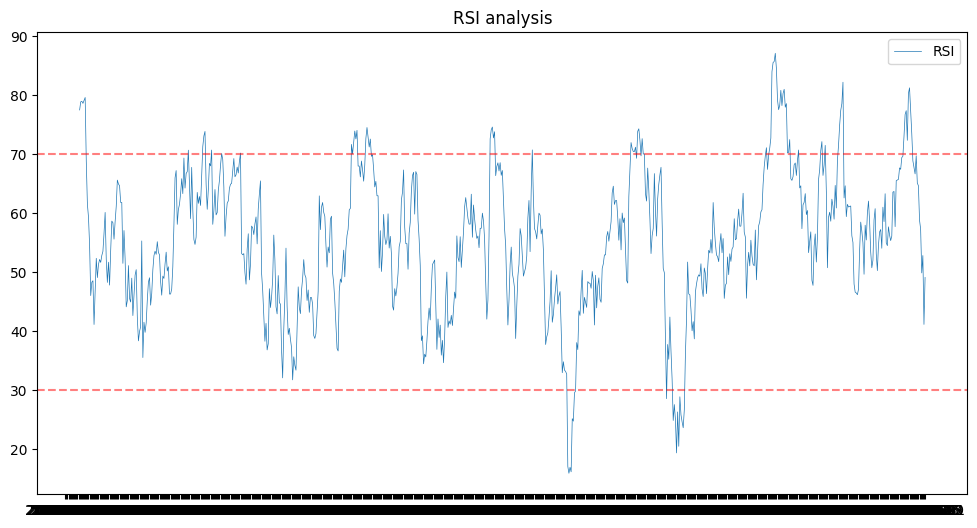

In [48]:
infy_data['RSI'] = ta.momentum.rsi(infy_data['Close'],window=14)

plt.figure(1,(12,6))
plt.plot(infy_data['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend()
infy_data.tail()

In [50]:
origData = infy_data[['Close']].copy()  # Remove 'Date' from the list of columns
origData['Date'] = infy_data.index  # Assuming the dates are in the index
origData['Date'] = pd.to_datetime(origData['Date']) # Convert to datetime object

In [51]:
origData.info()
origData.set_index('Date',inplace=True)
origData

<class 'pandas.core.frame.DataFrame'>
Index: 776 entries, 2018-01-02 to 2021-02-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Close   776 non-null    float64       
 1   Date    776 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.2+ KB


,Close
Date,
2018-01-02,7.24550
2018-01-03,7.18336
2018-01-04,7.13869
2018-01-05,7.27210
2018-01-08,7.33012
...,...
2021-01-26,17.24400
2021-01-27,16.87770
2021-01-28,17.04170


In [53]:
from statsmodels.tsa import seasonal,arima_model
import statsmodels.api as st
import pandas as pd
import numpy as np
tempdata = origData.copy()
# now use this data to train the SARIMA model
# lets create the forecaster

sarima_model = st.tsa.statespace.SARIMAX(tempdata,order=(1,1,1),seasonal_order=(1,1,1,12))
# train the model
sarima_model = sarima_model.fit()

# forecaste the value
value_for= sarima_model.forecast()
print(value_for)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


776    16.72762
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [55]:
tempdata.shape

(776, 1)

<Figure size 640x480 with 0 Axes>

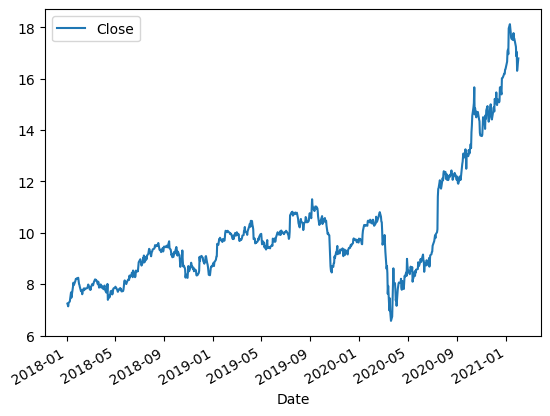

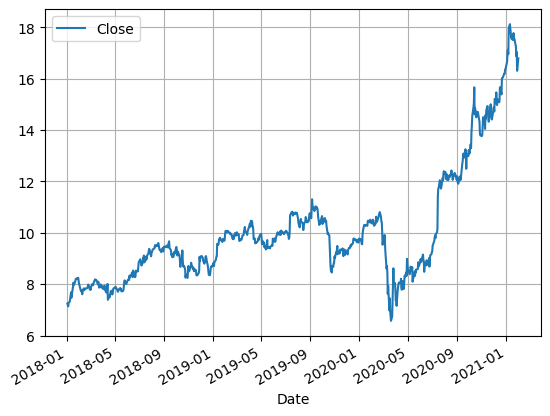

In [58]:
plt.figure(1)
tempdata.plot(label='forecasted')
origData.plot(label='Original')
plt.legend()
plt.grid('on')